import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

In [2]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['species'] = iris.target

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
print("Missing values:\n", iris_df.isnull().sum())

print("\nDataset shape:", iris_df.shape)

print("\nSummary statistics:\n", iris_df.describe())

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Dataset shape: (150, 5)

Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000

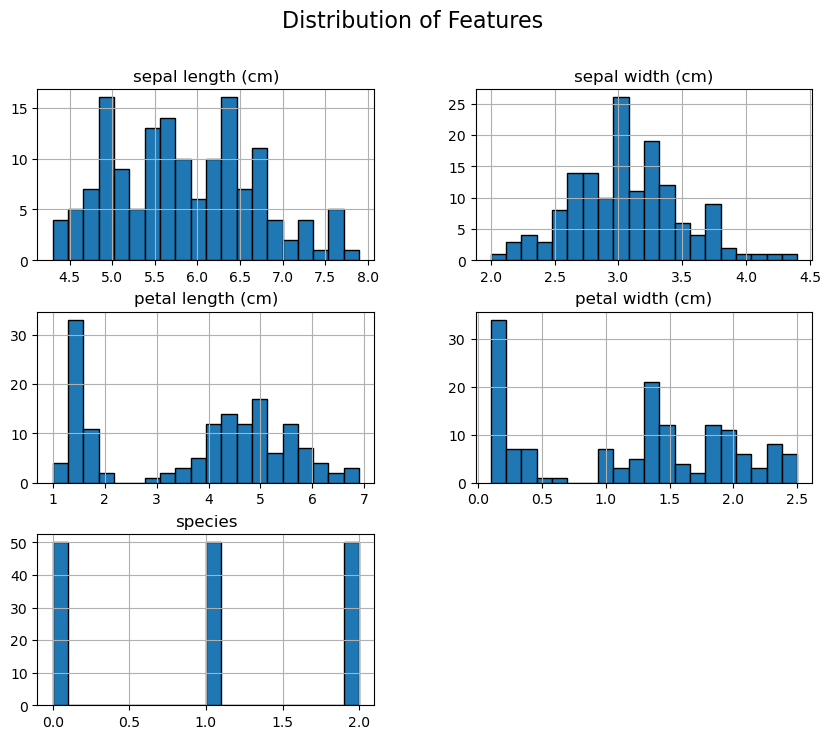

In [4]:
iris_df.hist(bins=20, figsize=(10, 8), edgecolor='black')

plt.suptitle("Distribution of Features", size=16)

plt.show()

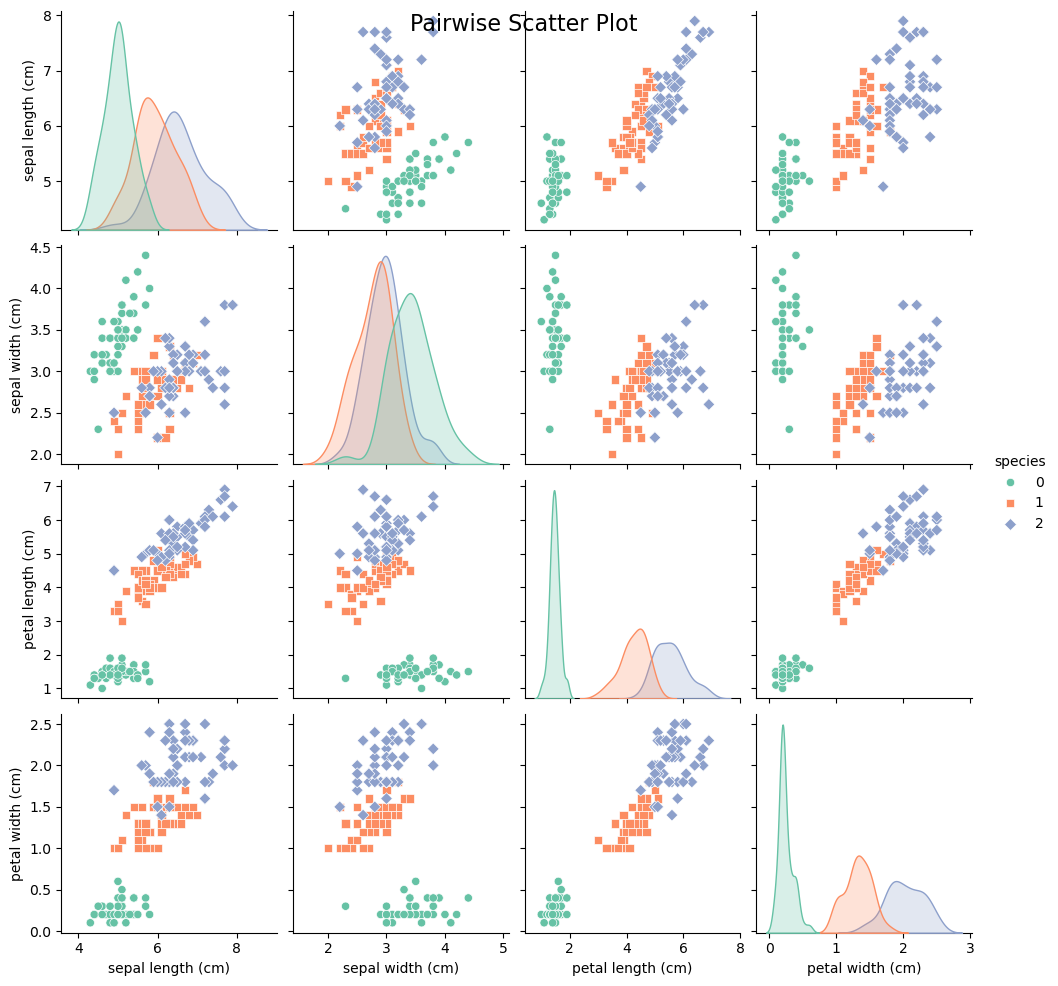

In [5]:
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette="Set2")

plt.suptitle("Pairwise Scatter Plot", size=16)

plt.show()

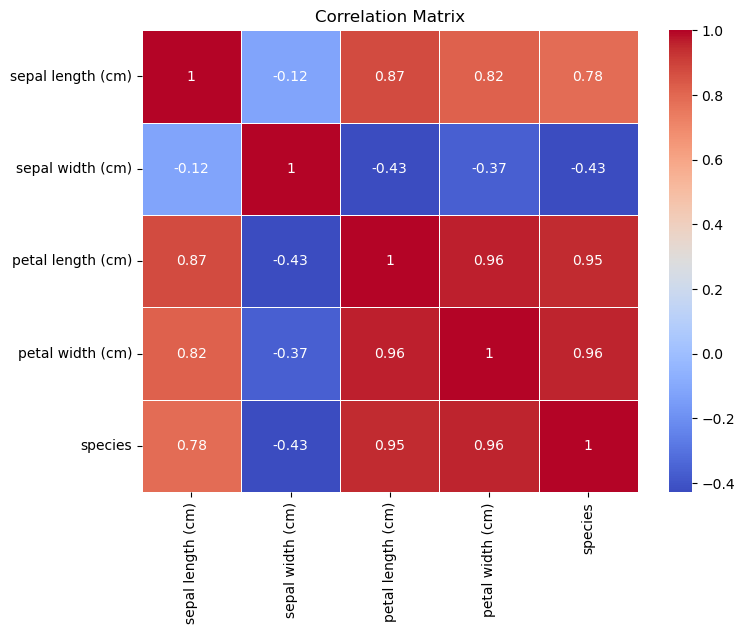

In [6]:
plt.figure(figsize=(8, 6))

sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Matrix")

plt.show()

In [7]:
X = iris_df.drop('species', axis=1)

y = iris_df['species']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)

print("X_test shape:", X_test.shape)

print("y_train shape:", y_train.shape)

print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("\nClassification Report:\n", class_report)

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_scaled)

clusters = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, clusters)

print("Silhouette Score for K-Means Clustering:", silhouette_avg)


Silhouette Score for K-Means Clustering: 0.4798814508199817


C:\Users\rushi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


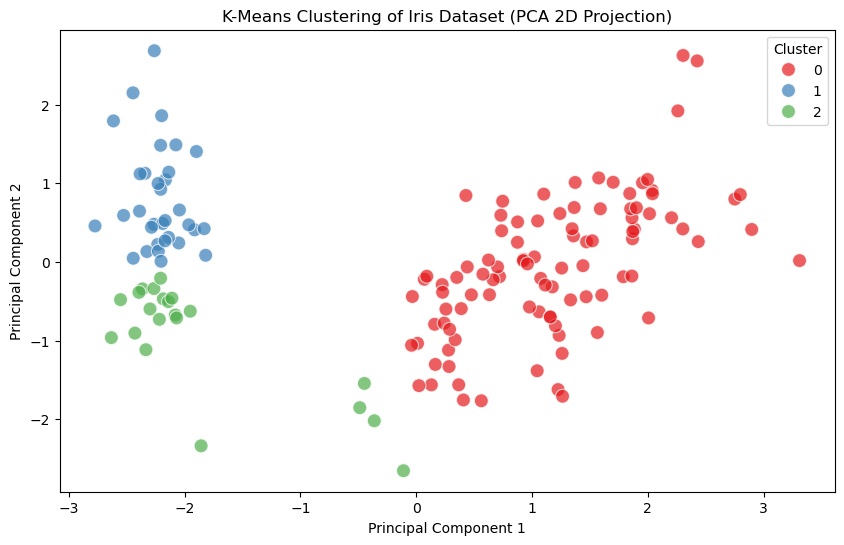

In [13]:
from sklearn.decomposition import PCA



# Reduce the feature space to 2D for visualization

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)



# Plotting the clusters

plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=100, alpha=0.7)

plt.title("K-Means Clustering of Iris Dataset (PCA 2D Projection)")

plt.xlabel("Principal Component 1")

plt.ylabel("Principal Component 2")

plt.legend(title="Cluster")
plt.show()